**Financial Investing**

Money loses value over time(Inflation).
Eg: With 100 Rupees we can get 5, 1 litre water bottles today. But down the line, in next 5 years we might not get same quantity of Water Bottles.
Because of this very reason, just Saving Money for a long term is a Bad Strategy.

Investment is a better option as we can invest in assets that could increase in value over time.

Common low/medium-risk investments are Stock Collections(Mutual Funds) and Real Estate.

High Risk assets are Precious Metals, Individual Stocks etc.

Crypto Currencies used to be extremely risky, but now they are slightly less risky because of it's widespread use and Institutional Adoption.



**Import and Average Historical Data from One Coin**
We are going to use the library: Historic_Crypto

1. Check all available assets.
2. Import historical data of Ethereum.
3. Visualize Eth data.
4. Average all price data.
5. plot historical data(y-log).



In [1]:
pip install Historic-Crypto


You should consider upgrading via the 'C:\Users\AkhilVNairNair\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [6]:
#the cyrpto functions

from Historic_Crypto import HistoricalData
from Historic_Crypto import Cryptocurrencies

#Other Libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np



In [7]:
#Checking all assets

Cryptocurrencies().find_crypto_pairs()

Connected to the CoinBase Pro API.
Extended Output is False, returning reduced dataset.


,id,display_name,fx_stablecoin,max_slippage_percentage,status
0,MCO2-USD,MCO2/USD,False,0.03000000,online
1,SOL-USDT,SOL/USDT,False,0.03000000,online
2,ASM-USD,ASM/USD,False,0.03000000,online
3,REQ-BTC,REQ/BTC,False,0.03000000,online
4,WCFG-USDT,WCFG/USDT,False,0.03000000,online
...,...,...,...,...,...
455,XRP-BTC,XRP/BTC,False,0.10000000,delisted
456,XRP-EUR,XRP/EUR,False,0.10000000,delisted
457,GNT-USDC,GNT/USDC,False,0.03000000,delisted
458,XRP-USD,XRP/USD,False,0.10000000,delisted


In [26]:
#importing Ethereum

eth = HistoricalData('ETH-EUR',60*60*24,'2020-01-01-00-00','2022-01-01-00-00').retrieve_data()

Checking input parameters are in the correct format.
Formatting Dates.
Checking if user supplied is available on the CoinBase Pro API.
Connected to the CoinBase Pro API.
Ticker 'ETH-EUR' found at the CoinBase Pro API, continuing to extraction.
Provisional Start: 2020-01-01T00:00:00
Provisional End: 2020-10-27T00:00:00
Data for chunk 1 of 3 extracted
Provisional Start: 2020-10-27T00:00:00
Provisional End: 2021-08-23T00:00:00
Data for chunk 2 of 3 extracted
Provisional Start: 2021-08-23T00:00:00
Provisional End: 2022-06-19T00:00:00
Data for chunk 3 of 3 extracted


In [27]:
eth.head()

,low,high,open,close,volume
time,,,,,
2020-01-02,112.86,116.38,116.26,113.49,9359.933771
2020-01-03,112.24,120.90,113.59,120.16,13387.415938
2020-01-04,118.72,121.81,120.32,120.37,7809.366324
2020-01-05,120.39,124.63,120.39,121.47,11080.374478
2020-01-06,120.92,129.09,121.35,128.82,19700.803021


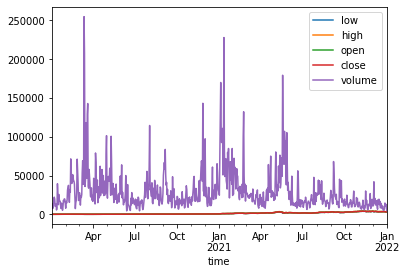

In [28]:
eth.plot.line();

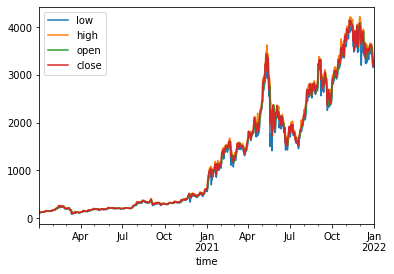

In [29]:
#plots excluding the column 'Volume'

eth[['low','high','open','close']].plot.line()
plt.show()

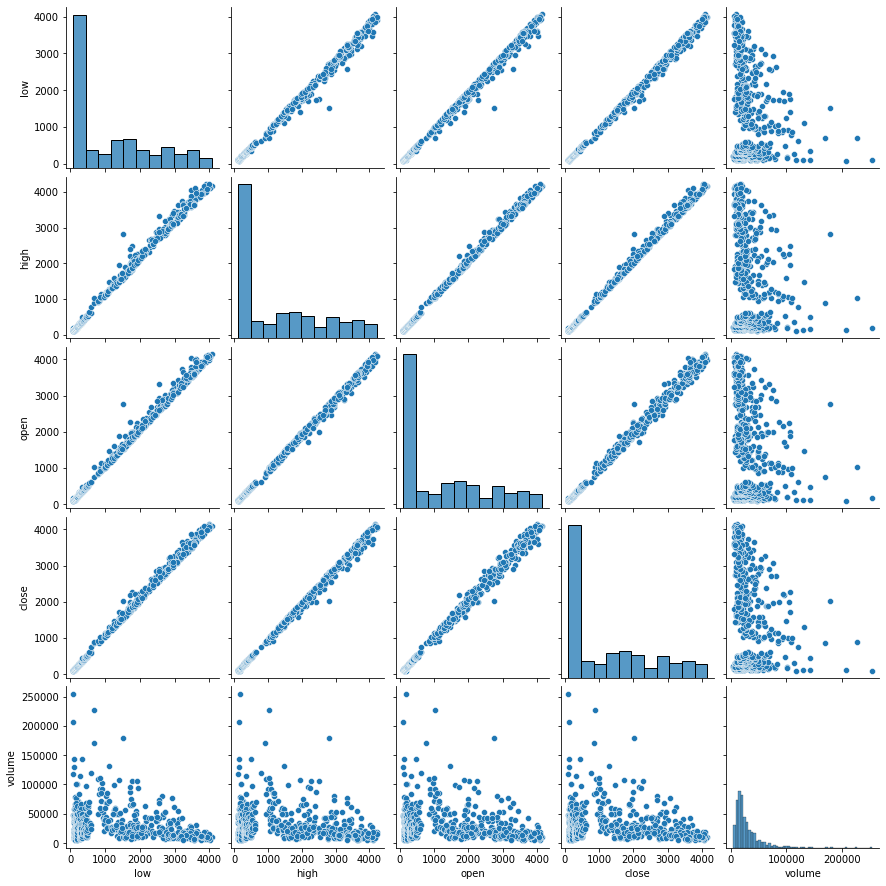

In [30]:
#getting a pairplot to understand the relationships between the columns

sns.pairplot(eth);

From the pairplot, we see that all the 'Price' Columns are strongly co-related and the price against volumes don't show strong Co-Relation.

Since the Price indicators are Strongly Co-Related, we can calculate a single number representing price for each date.

That is we can calculate the average of all prices, to represent a price for each day.


In [31]:
eth['avg_price'] = eth[['low','high','open','close']].mean(axis=1)

In [197]:
eth.head()

,low,high,open,close,volume,avg_price
time,,,,,,
2020-01-02,112.86,116.38,116.26,113.49,9359.933771,114.7475
2020-01-03,112.24,120.90,113.59,120.16,13387.415938,116.7225
2020-01-04,118.72,121.81,120.32,120.37,7809.366324,120.3050
2020-01-05,120.39,124.63,120.39,121.47,11080.374478,121.7200
2020-01-06,120.92,129.09,121.35,128.82,19700.803021,125.0450


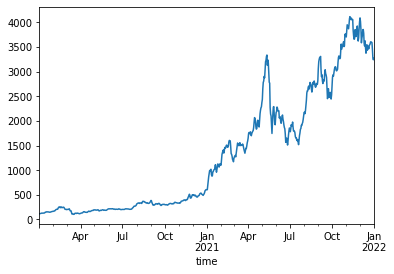

In [33]:
#Linear Scale
eth['avg_price'].plot();

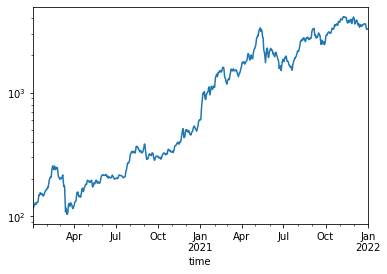

In [34]:
#log Scale

eth['avg_price'].plot(logy=True);

Usually for time series plots, log scale provides a better representation of Data than a Linear Scale, as this could be seen from the plots above.

**Create a Dataframe of Selected Coins**

In [36]:
all_coins = Cryptocurrencies().find_crypto_pairs()['id']

Connected to the CoinBase Pro API.
Extended Output is False, returning reduced dataset.


In [50]:
all_coins = list(all_coins)
print(all_coins)
print(len(all_coins))

['ATOM-BTC', 'AVAX-USDT', 'REQ-USD', 'FIDA-EUR', 'GALA-USD', 'BICO-USD', 'FORTH-EUR', 'LINK-USD', 'ATOM-EUR', 'UMA-GBP', 'SOL-ETH', 'ENJ-USDT', 'PERP-USD', 'AVT-USD', 'OMG-BTC', 'WCFG-USD', 'MANA-BTC', 'MATIC-GBP', 'DDX-USD', 'USDC-GBP', 'REQ-USDT', 'MATIC-BTC', 'NCT-USD', 'ORN-BTC', 'CTX-USDT', 'DDX-EUR', 'TRU-USD', 'LRC-USDT', 'BNT-GBP', 'UPI-USD', 'USDC-EUR', 'ETH-USDC', 'RNDR-EUR', 'CRO-USDT', 'BTC-USDT', 'PLA-USD', 'TRU-EUR', 'COTI-USD', 'KRL-USD', 'UST-EUR', 'BAT-USD', 'UST-USD', 'ZEN-USD', 'XYO-BTC', 'SUSHI-BTC', 'FOX-USD', 'ASM-USDT', 'GTC-USD', 'ZRX-BTC', 'BTRST-USDT', 'MPL-USD', 'UPI-USDT', 'UNI-USD', 'AUCTION-EUR', 'REQ-BTC', 'IDEX-USDT', 'KRL-EUR', 'WCFG-USDT', '1INCH-BTC', 'PAX-USD', 'FET-USD', 'CRV-BTC', 'GALA-USDT', 'NKN-GBP', 'TRIBE-USD', 'ICP-USDT', 'ALGO-GBP', 'DIA-EUR', 'ARPA-EUR', 'WLUNA-EUR', 'ENJ-USD', 'LINK-USDT', 'ORN-USD', 'RLY-USD', 'RAI-USD', 'BICO-EUR', 'SUSHI-GBP', 'ZRX-EUR', 'PERP-EUR', 'TRU-USDT', 'LTC-GBP', 'TRAC-USDT', 'LOOM-USDC', 'CTSI-BTC', 'BNT-USD'

In [51]:
#Extracting only EURO coins from the list

word = 'EUR'

eur_coins = []

for i in all_coins:
    if word in i:
        eur_coins.append(i)

eur_coins


['FIDA-EUR',
 'FORTH-EUR',
 'ATOM-EUR',
 'DDX-EUR',
 'USDC-EUR',
 'RNDR-EUR',
 'TRU-EUR',
 'UST-EUR',
 'AUCTION-EUR',
 'KRL-EUR',
 'DIA-EUR',
 'ARPA-EUR',
 'WLUNA-EUR',
 'BICO-EUR',
 'ZRX-EUR',
 'PERP-EUR',
 'ETH-EUR',
 'BNT-EUR',
 'CRV-EUR',
 'FIL-EUR',
 'SHIB-EUR',
 'ALGO-EUR',
 'GRT-EUR',
 'ICP-EUR',
 'VGX-EUR',
 'MATIC-EUR',
 'BTRST-EUR',
 'XTZ-EUR',
 'BCH-EUR',
 'ERN-EUR',
 'DESO-EUR',
 'MIR-EUR',
 'OMG-EUR',
 'ADA-EUR',
 'DOT-EUR',
 'REQ-EUR',
 'CLV-EUR',
 'SUKU-EUR',
 '1INCH-EUR',
 'XYO-EUR',
 'GALA-EUR',
 'XLM-EUR',
 'ENS-EUR',
 'NKN-EUR',
 'SKL-EUR',
 'SUSHI-EUR',
 'UNI-EUR',
 'MASK-EUR',
 'ETC-EUR',
 'SOL-EUR',
 'SHPING-EUR',
 'IOTX-EUR',
 'POWR-EUR',
 'AAVE-EUR',
 'LTC-EUR',
 'BAT-EUR',
 'RAD-EUR',
 'SNX-EUR',
 'NCT-EUR',
 'TRAC-EUR',
 'RLY-EUR',
 'BAND-EUR',
 'AVAX-EUR',
 'EOS-EUR',
 'ANKR-EUR',
 'LQTY-EUR',
 'BADGER-EUR',
 'CHZ-EUR',
 'LCX-EUR',
 'NU-EUR',
 'MANA-EUR',
 'USDT-EUR',
 'UMA-EUR',
 'DOGE-EUR',
 'CGLD-EUR',
 'ALCX-EUR',
 'WCFG-EUR',
 'NMR-EUR',
 'AXS-EUR',
 'CT

In [100]:
len(eur_coins)

84

In [122]:
#Importing 5 of these EUR currencies into a DataFrame
#We already have the data for Ethereum.
#let's get the data for BTC-EUR,XLM-EUR,ALGO-EUR,LINK-EUR

btc = HistoricalData('BTC-EUR',60*60*24,'2020-01-01-00-00','2022-01-01-00-00').retrieve_data()
xlm = HistoricalData('XLM-EUR',60*60*24,'2020-01-01-00-00','2022-01-01-00-00').retrieve_data()
algo = HistoricalData('ALGO-EUR',60*60*24,'2020-01-01-00-00','2022-01-01-00-00').retrieve_data()
link = HistoricalData('LINK-EUR',60*60*24,'2020-01-01-00-00','2022-01-01-00-00').retrieve_data()


Checking input parameters are in the correct format.
Formatting Dates.
Checking if user supplied is available on the CoinBase Pro API.
Connected to the CoinBase Pro API.
Ticker 'BTC-EUR' found at the CoinBase Pro API, continuing to extraction.
Provisional Start: 2020-01-01T00:00:00
Provisional End: 2020-10-27T00:00:00
Data for chunk 1 of 3 extracted
Provisional Start: 2020-10-27T00:00:00
Provisional End: 2021-08-23T00:00:00
Data for chunk 2 of 3 extracted
Provisional Start: 2021-08-23T00:00:00
Provisional End: 2022-06-19T00:00:00
Data for chunk 3 of 3 extracted
Checking input parameters are in the correct format.
Formatting Dates.
Checking if user supplied is available on the CoinBase Pro API.
Connected to the CoinBase Pro API.
Ticker 'XLM-EUR' found at the CoinBase Pro API, continuing to extraction.
Provisional Start: 2020-01-01T00:00:00
Provisional End: 2020-10-27T00:00:00
Data for chunk 1 of 3 extracted
Provisional Start: 2020-10-27T00:00:00
Provisional End: 2021-08-23T00:00:00
Data

In [123]:
#Getting average price for each coin

btc['btc_avg_price'] = btc[['low','high','open','close']].mean(axis=1)
xlm['xlm_avg_price'] = xlm[['low','high','open','close']].mean(axis=1)
algo['algo_avg_price'] = algo[['low','high','open','close']].mean(axis=1)
link['link_avg_price'] = link[['low','high','open','close']].mean(axis=1)


In [155]:
df = pd.concat([btc['btc_avg_price'],eth['avg_price'],xlm['xlm_avg_price'],algo['algo_avg_price'],link['link_avg_price']],axis=1)

In [156]:
df_columns = ['BTC-EUR','ETH-EUR','XLM-EUR','ALGO-EUR','LINK-EUR']
df_columns[0:5]

['BTC-EUR', 'ETH-EUR', 'XLM-EUR', 'ALGO-EUR', 'LINK-EUR']

In [157]:
df.rename(columns = {'btc_avg_price':df_columns[0],'avg_price':df_columns[1],'xlm_avg_price':df_columns[2],'algo_avg_price':df_columns[3],'link_avg_price':df_columns[4]}, inplace=True)

In [158]:
df.head()

,BTC-EUR,ETH-EUR,XLM-EUR,ALGO-EUR,LINK-EUR
time,,,,,
2020-01-02,6308.8575,114.7475,0.039717,NaN,NaN
2020-01-03,6392.0275,116.7225,0.039859,NaN,NaN
2020-01-04,6577.2700,120.3050,0.040733,NaN,NaN
2020-01-05,6610.8125,121.7200,0.040897,NaN,NaN
2020-01-06,6770.9825,125.0450,0.043053,NaN,NaN


In [272]:
df

,BTC-EUR,ETH-EUR,XLM-EUR,ALGO-EUR,LINK-EUR
time,,,,,
2020-01-02,6308.8575,114.7475,0.039717,NaN,NaN
2020-01-03,6392.0275,116.7225,0.039859,NaN,NaN
2020-01-04,6577.2700,120.3050,0.040733,NaN,NaN
2020-01-05,6610.8125,121.7200,0.040897,NaN,NaN
2020-01-06,6770.9825,125.0450,0.043053,NaN,NaN
...,...,...,...,...,...
2021-12-28,43370.1050,3454.5700,0.253323,1.378875,19.1450
2021-12-29,41561.1050,3280.3400,0.239778,1.346375,17.7925
2021-12-30,41369.2050,3242.5075,0.236257,1.455250,17.4975


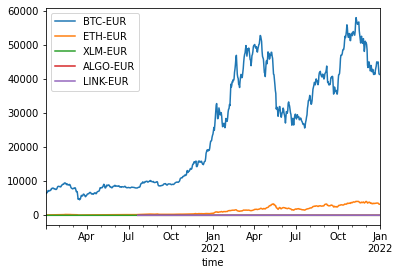

In [160]:
#Plotting historical prices

df.plot.line();

In [229]:
#Scaling the data, so that the prices are in range of [0,1].
#This eliminates the currency being in Euro unit and is scaled between 0&1. 

#To scale we use the formula
# scaled_unit = (price-minimum_price)/(maximum_price-minimum_price)
#maximum_price-minimum_price gives the range. 

scaled_df = df.apply(lambda x: ((x -x.min())/(x.max()-x.min())))

In [230]:
scaled_df

,BTC-EUR,ETH-EUR,XLM-EUR,ALGO-EUR,LINK-EUR
time,,,,,
2020-01-02,0.032743,0.002782,0.013722,NaN,NaN
2020-01-03,0.034297,0.003274,0.013980,NaN,NaN
2020-01-04,0.037759,0.004167,0.015559,NaN,NaN
2020-01-05,0.038386,0.004519,0.015856,NaN,NaN
2020-01-06,0.041379,0.005348,0.019753,NaN,NaN
...,...,...,...,...,...
2021-12-28,0.725350,0.834850,0.399776,0.685053,0.374332
2021-12-29,0.691543,0.791443,0.375296,0.666158,0.335680
2021-12-30,0.687957,0.782018,0.368933,0.729456,0.327250


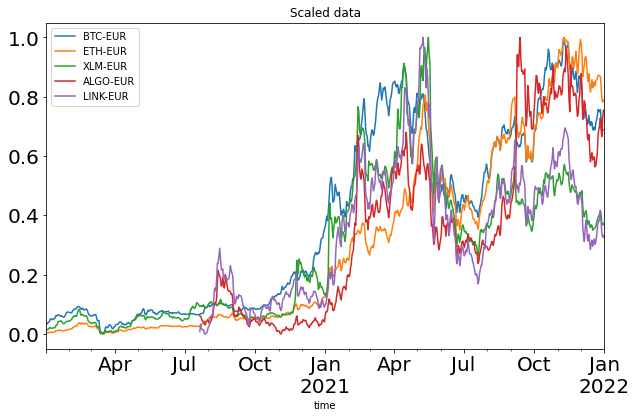

In [231]:
#plotting the scaled data

scaled_df.plot.line(title='Scaled data', fontsize=20,
figsize=(10,6));

In [193]:
#getting data to be scaled for 11th of May to 1
#That is, the value of all coins on 11th of May is 1. 

scaled_df_11th_may = (df - df.min()) / (df.loc['2021-05-11'].values[:]-df.min())


In [194]:
scaled_df_11th_may

,BTC-EUR,ETH-EUR,XLM-EUR,ALGO-EUR,LINK-EUR
time,,,,,
2020-01-02,0.042166,0.003482,0.014199,NaN,NaN
2020-01-03,0.044168,0.004098,0.014465,NaN,NaN
2020-01-04,0.048626,0.005215,0.016100,NaN,NaN
2020-01-05,0.049433,0.005657,0.016407,NaN,NaN
2020-01-06,0.053288,0.006694,0.020439,NaN,NaN
...,...,...,...,...,...
2021-12-28,0.934094,1.044952,0.413660,1.224043,0.399266
2021-12-29,0.890558,0.990622,0.388329,1.190282,0.358040
2021-12-30,0.885940,0.978824,0.381745,1.303381,0.349048


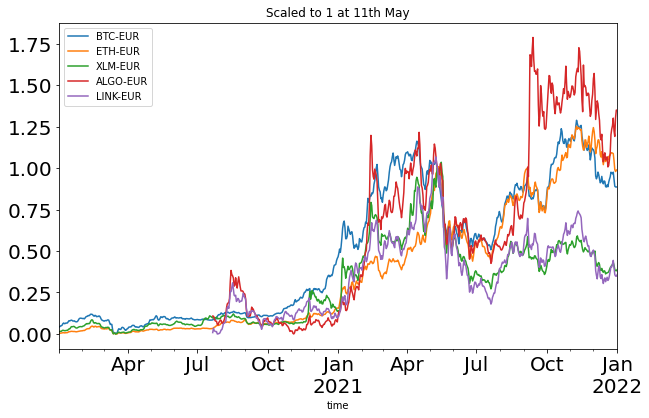

In [195]:
#plotting the data that was scaled to 1 at 11th May.
scaled_df_11th_may.plot.line(title='Scaled to 1 at 11th May', fontsize=20,
figsize=(10,6));

**Data Dimensionality via PCA**

1. Compute Correlation matrix
2. Compute PCA of raw data.
3. PCA of May-11 scaled data.
4. Inspect "scree plot".
5. Repeat with mean removed--"Mean centered around Coins and not around Time".


In [202]:
df.corr() 

#by using this method, pandas automatically doesn't consider the missing values in
#ALGO and LINK coins.

,BTC-EUR,ETH-EUR,XLM-EUR,ALGO-EUR,LINK-EUR
BTC-EUR,1.000000,0.908800,0.914332,0.883416,0.860735
ETH-EUR,0.908800,1.000000,0.784756,0.906294,0.724632
XLM-EUR,0.914332,0.784756,1.000000,0.704865,0.945704
ALGO-EUR,0.883416,0.906294,0.704865,1.000000,0.770661
LINK-EUR,0.860735,0.724632,0.945704,0.770661,1.000000


We see that the weakest correaltion is at 0.704865.
But These correlation cannot be taken for a final or to provide an insight on all the Crypto currencies.

That is, if there are 100 currencies, this only consititutes for 5% of it.

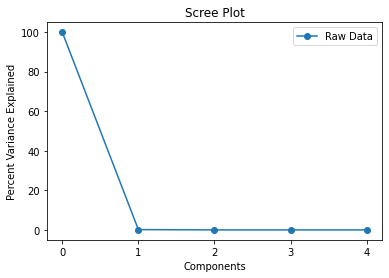

In [208]:
#PCA

pca = PCA()
pca.fit(df.dropna())

#plotting explained variance ration

plt.plot(100*pca.explained_variance_ratio_,'o-', label='Raw Data')
plt.xticks(range(pca.n_components_))
plt.xlabel('Components')
plt.ylabel('Percent Variance Explained')
plt.legend()
plt.title('Scree Plot')
plt.show()

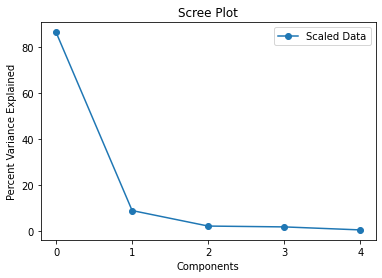

In [209]:
#PCA Scaled

pca_scaled = PCA()
pca_scaled.fit(scaled_df.dropna())

#plotting explained variance ration

plt.plot(100*pca_scaled.explained_variance_ratio_,'o-', label='Scaled Data')
plt.xticks(range(pca_scaled.n_components_))
plt.xlabel('Components')
plt.ylabel('Percent Variance Explained')
plt.legend()
plt.title('Scree Plot')
plt.show()

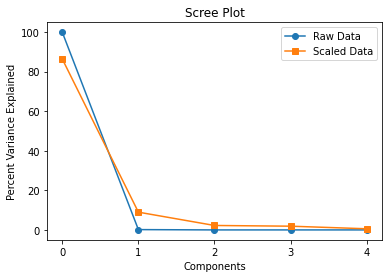

In [210]:
#Combining both the plots


#plotting explained variance ration

plt.plot(100*pca.explained_variance_ratio_,'o-', label='Raw Data')
plt.plot(100*pca_scaled.explained_variance_ratio_,'s-', label='Scaled Data')
plt.xticks(range(pca.n_components_))
plt.xlabel('Components')
plt.ylabel('Percent Variance Explained')
plt.legend()
plt.title('Scree Plot')
plt.show()

**Explained Variance Ratio:** This is the Percentage of **variance** that is attributed by each of the Selected Components.(In this case the 5 currencies that we selected.)

From the Scree Plot above, we see that the explained variance ratio for Raw data has 100% for the **First Component** that is for **Bitcoin**. And 0% for the rest of the coins in this Data.

And for the Scaled Data, we again see around 85% for the **First Component** that is **Bitcoin**, 10% for the **Second Component** that is **Ethereum** and less than 5% for the rest, constituting a total of 100%.

On Both the plots we notice that from the selected 5 Currencies, **Bitcoin** values are the ones that are a major contribution over time and is acting as a Market Predictor for the 5 Selected Currencies.

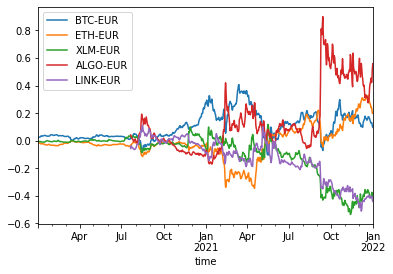

In [237]:
#Mean Centering the data scaled to 1 at 11th of May to get the PCA explained variance for 
#Mean centered data as well.
scaled_df_MC = scaled_df_11th_may.sub(scaled_df_11th_may.mean(axis=1),axis=0)
scaled_df_MC.plot();


In [238]:
#PCA for scaled Mean Centered Data
pca_MC = PCA()
pca_MC.fit(scaled_df_MC.dropna())


PCA()

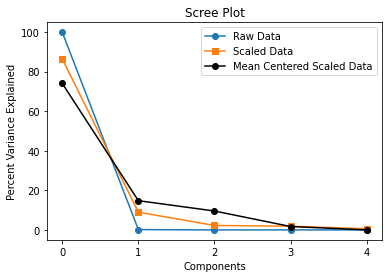

In [243]:
#Plotting all three together

plt.plot(100*pca.explained_variance_ratio_,'o-', label='Raw Data')
plt.plot(100*pca_scaled.explained_variance_ratio_,'s-', label='Scaled Data')
plt.plot(100*pca_MC.explained_variance_ratio_,'k-o', label='Mean Centered Scaled Data')
plt.xticks(range(pca.n_components_))
plt.xlabel('Components')
plt.ylabel('Percent Variance Explained')
plt.legend()
plt.title('Scree Plot')
plt.show()

The Mean Centered Data has further Squeezed the plot, where we see the Top component contributing around 76% of Variance.

From these we see that, for the selected 5 currencies and no matter how the data is processed, we notice that the first Component(**Bitcoin**) is driving this subset of Market.

**Dollar Cost Averaging(DCA) Investments and Lump-Sum Investments**

DCA is an investment technique, where we invest on an asset with a small share of an amount continously over a period of Time.

Example: We have 10,000 Rupees and we invest 10% of 10000 each month for a period 10 months on an Asset.
We know that, the value of asset fluctuates over time and we always hope for the Value to be higher at the end of Investment period.

As opposed to DCA, there is Lump-Sum investment as well, which refers to Invest as much as Possible at one shot. This outperforms DCA when we know for sure, the Volatility is Low.



**Simulating DCA Investments**

1. Fixed DCA Simulation.(On ETH--10Euros/day)

2. Variable DCA Simulation.(On ETH--7Euros if Price increases from Previous Day, 15Euros if Price decreases from Previous Day.)

3. Proportional DCA Simulation.(On ETH--10 Euros if Price increases from Previous Day, 10Euros*Relative Proportion if Price Decreases.)

In [274]:
#Simulation 1

dailyInvest = 10

#Which coin to simulate

whichCoin = 'ETH-EUR'

#Initialize our Investment amounts

euroInvest = 0
coinInvest = 0

#Loop through days

for dayi in range(df.shape[0]):
    #buy some coin
    coin = dailyInvest / df[whichCoin][dayi]
    euroInvest += dailyInvest
    coinInvest += coin

#compute the final value in euros of our investment

eurosAtEnd = coinInvest * df[whichCoin][-1]

print(f'Total Euro invested: \u20ac{euroInvest:,.2f}')
print(f'Total {whichCoin[:-4]} Purchased: {coinInvest:.7f}')
print(f'End Result: \u20ac{eurosAtEnd:,.2f}')


Total Euro invested: €7,310.00
Total ETH Purchased: 18.2378781
End Result: €59,782.76


In [275]:
#Simulation 2

dailyInvestUp = 7
dailyInvestDn = 15

#Which coin to simulate

whichCoin = 'ETH-EUR'

#Initialize our Investment amounts

euroInvest = 0
coinInvest = 0

#Loop through days

for dayi in range(1,df.shape[0]):

    #buy some coin

    if (df[whichCoin][dayi] > df[whichCoin][dayi-1]): #For price gone up
        coin = dailyInvestUp / df[whichCoin][dayi]
        euroInvest += dailyInvestUp
    else: #for price gone down
        coin = dailyInvestDn / df[whichCoin][dayi]
        euroInvest += dailyInvestDn 
    
    #add to totals
    coinInvest += coin

#compute the final value in euros of our investment

eurosAtEnd = coinInvest * df[whichCoin][-1]

print(f'Total Euro invested: \u20ac{euroInvest:,.2f}')
print(f'Total {whichCoin[:-4]} Purchased: {coinInvest:.7f}')
print(f'End Result: \u20ac{eurosAtEnd:,.2f}')


Total Euro invested: €7,526.00
Total ETH Purchased: 18.6932644
End Result: €61,275.49


In [278]:
#Simulation 3

dailyInvest = 10

#Which coin to simulate

whichCoin = 'ETH-EUR'

#Initialize our Investment amounts

euroInvest = 0
coinInvest = 0

pctchng = [0]*df.shape[0]

#Loop through days

for dayi in range(1,df.shape[0]):

    #compute the percent change from the previous day.
    pctchng[dayi] = 100*(df[whichCoin][dayi] - df[whichCoin][dayi-1]) / df[whichCoin][dayi-1]


    #buy some coin
    if pctchng[dayi] > 0: #positive percent change
        toinvest = dailyInvest
    else: #negative percent change
        toinvest = dailyInvest * -pctchng[dayi] #because money cannot be negative
    
    #add to totals
    coin = toinvest / df[whichCoin][dayi]
    euroInvest += toinvest
    coinInvest += coin

#compute the final value in euros of our investment

eurosAtEnd = coinInvest * df[whichCoin][-1]

print(f'Total Euro invested: \u20ac{euroInvest:,.2f}')
print(f'Total {whichCoin[:-4]} Purchased: {coinInvest:.7f}')
print(f'End Result: \u20ac{eurosAtEnd:,.2f}')


Total Euro invested: €12,206.67
Total ETH Purchased: 30.2114649
End Result: €99,031.52


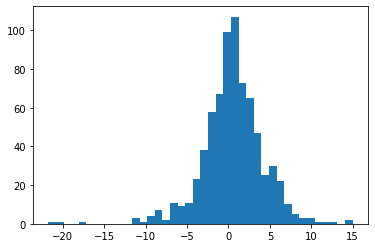

In [281]:
#plotting the percentage change

plt.hist(pctchng,bins=40);


**Which Coin should we Buy?**

Simulate 10Euros per day for 5 Coins.

In [296]:
dailyInvest = 10


coins2eval = list(df.columns)
#initialize the investments (coin:amount)
euroInvest_new = {}
coinInvest_new = {}

#loop through days

for dayi in range(df.shape[0]):
    #loop over all coins
    for coinname in coins2eval:

        #initialize the investment amounts
        if dayi==0:
            euroInvest_new[coinname] = 0
            coinInvest_new[coinname] = 0

        #how many coins did we buy on this day
        coin = dailyInvest / df[coinname][dayi]

        if np.isnan(coin):
            continue

        #add to totals

        euroInvest_new[coinname] += dailyInvest
        coinInvest_new[coinname] += coin



In [311]:
# convert from coin to euro and print
for coinname in coins2eval:
  eurosAtEnd = coinInvest_new[coinname]*df[coinname][-1]
  print(f'{coinname[:-4]:>5}:  \u20ac{euroInvest_new[coinname]:,.2f}  \u21e8  \u20ac{eurosAtEnd:>9,.2f}')

  BTC:  €7,310.00  ⇨  €21,122.41
  ETH:  €7,310.00  ⇨  €59,782.76
  XLM:  €7,310.00  ⇨  €16,809.59
 ALGO:  €5,300.00  ⇨  €14,726.95
 LINK:  €5,300.00  ⇨  € 6,101.65
